In [50]:
import pandas as pd
import numpy as np
import nltk

In [54]:
reviews = pd.read_csv('review.txt',delimiter='\t')
reviews.head()

,review,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


<h3>Term-Frequency Inverse-Document-Frequency (TF-IDF)</h3>

<h4>Tokenizing the Documents</h4>

In [6]:
from nltk.tokenize import word_tokenize

reviews_tknz = [word_tokenize(r) for r in reviews['review']]
reviews_tknz[:5]

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.'],
 ['Good', 'case', ',', 'Excellent', 'value', '.'],
 ['Great', 'for', 'the', 'jawbone', '.'],
 ['Tied',
  'to',
  'charger',
  'for',
  'conversations',
  'lasting',
  'more',
  'than',
  '45',
  'minutes.MAJOR',
  'PROBLEMS',
  '!',
  '!'],
 ['The', 'mic', 'is', 'great', '.']]

<h4>Removing Stop Words</h4>

While being a common step in processing text data, we can see that in this case, removing stop words largely neutralizes the reviews, therefore we will not do this in this particular project.

In [10]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'had', 'then', "should've", 'with', 'he', 'nor', 'off', 'in', 'will', 'been', 'its', 'after', 'are', "wasn't", 'about', "shouldn't", 'isn', 'before', 've', 's', 'yours', 'no', 'ma', 'out', 'wasn', "she's", 'our', 'below', 'how', 'some', 't', 'needn', "couldn't", "you've", 'do', 'while', 'the', 'why', 'theirs', 'if', "mightn't", 'now', 'it', 'into', 'where', 'most', 'y', "hadn't", 'she', 'all', 'under', 'has', 'that', 'down', "mustn't", 'doing', 'ain', 'didn', 'whom', 'what', 'for', 'few', 'only', 'we', 'ours', 'did', 'be', 'other', 'each', "it's", "hasn't", 'so', 'was', 'during', "needn't", 'doesn', 'shouldn', 'from', 'between', 'don', 'hadn', 'on', 'can', 'herself', 'they', 'should', 'such', 'just', 'my', 'them', 'who', 'because', "doesn't", "haven't", "shan't", 'won', 'does', 'myself', 'themselves', "you'd", 'once', 'very', 'mustn', 'up', 'than', 'this', 'as', 'their', 'of', 'll', 'not', 're', "don't", 'having', 'to', 'and', 'himself', "won't", 'ourselves', 'being', "wouldn't", 'her

In [64]:
reviews_flt = [[w  for w in r if w not in stop_words] for r in reviews_tknz]
reviews_flt[:2]

[['So', 'way', 'plug', 'US', 'unless', 'I', 'go', 'converter', '.'],
 ['Good', 'case', ',', 'Excellent', 'value', '.']]

<h4>Stemming</h4>

In [24]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
reviews_stm = [[ps.stem(w) for w in r] for r in reviews_tknz]
reviews_stm[:2]

[['so',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'us',
  'unless',
  'i',
  'go',
  'by',
  'a',
  'convert',
  '.'],
 ['good', 'case', ',', 'excel', 'valu', '.']]

<h4>Lemmatizing</h4>

In [36]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

reviews_lem = [[lem.lemmatize(w,'v') for w in r] for r in reviews_stm]
reviews_lem[:2]

[['so',
  'there',
  'be',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'us',
  'unless',
  'i',
  'go',
  'by',
  'a',
  'convert',
  '.'],
 ['good', 'case', ',', 'excel', 'valu', '.']]

In [46]:
reviews_prc = [' '.join(r) for r in reviews_lem]
reviews_prc[:5]

['so there be no way for me to plug it in here in the us unless i go by a convert .',
 'good case , excel valu .',
 'great for the jawbon .',
 'tie to charger for convers last more than 45 minutes.major problem ! !',
 'the mic be great .']

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
reviews_tfidf = tfidf.fit_transform(reviews_prc)

In [56]:
indx = np.random.permutation(np.arange(len(reviews)))
train_indx = indx[:2000]
test_indx = indx[2000:]

trainX = reviews_tfidf[train_indx]
testX = reviews_tfidf[test_indx]
trainY = reviews['score'].values[train_indx]
testY = reviews['score'].values[test_indx]

<h4>Support Vector Machine</h4>

In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()

param_grid = [{
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel' : ['rbf'],
    'gamma' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}]

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX,trainY)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='accuracy')

In [59]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.8245000000000001


In [60]:
best_dt = grid_search.best_estimator_
best_dt.score(testX, testY)

0.8275401069518716

<h4>Neural Network</h4>

In [61]:
from sklearn.neural_network import MLPClassifier

n_features = trainX.shape[1]

param_grid = [{
    'hidden_layer_sizes' : [
                            [n_features//2,n_features//2],                 #two hidden layer with n_features/2 neurons
                            [n_features//2,n_features//2,n_features//2]],   #three hidden layer with n_features/2 neurons
    'alpha' : [0.01, 0.1, 1]                                    #regularization terms
}]

mlp = MLPClassifier(max_iter=1000)

grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX,trainY)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000),
             param_grid=[{'alpha': [0.01, 0.1, 1],
                          'hidden_layer_sizes': [[2024, 2024],
                                                 [2024, 2024, 2024]]}],
             return_train_score=True, scoring='accuracy')

In [62]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 1, 'hidden_layer_sizes': [2024, 2024]}
0.8005051528289909


In [63]:
best_dt = grid_search.best_estimator_
best_dt.score(testX, testY)

0.8141711229946524

<h3>Universal Sentence Encoder</h3>

In [66]:
import tensorflow as tf

import tensorflow_hub as hub

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)

In [68]:
reviews_use = model(reviews['review'])

In [77]:
reviews_use = np.array(reviews_use)
trainX_use = reviews_use[train_indx]
testX_use = reviews_use[test_indx]

<h4>Support Vector Machine</h4>

In [85]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()

param_grid = [{
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel' : ['rbf'],
    'gamma' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}]

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX_use,trainY)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='accuracy')

In [86]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.9019999999999999


In [87]:
best_dt = grid_search.best_estimator_
best_dt.score(testX_use, testY)

0.893048128342246

<h4>Neural Network</h4>

In [ ]:
from sklearn.neural_network import MLPClassifier

n_features = trainX.shape[1]

param_grid = [{
    'hidden_layer_sizes' : [
                            [n_features//2,n_features//2],                 #two hidden layer with n_features/2 neurons
                            [n_features//2,n_features//2,n_features//2]],   #three hidden layer with n_features/2 neurons
    'alpha' : [0.01, 0.1, 1]                                    #regularization terms
}]

mlp = MLPClassifier(max_iter=1000)

grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX_use,trainY)

In [84]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 1, 'hidden_layer_sizes': [2024, 2024]}
0.8885114499807153


In [83]:
best_dt = grid_search.best_estimator_
best_dt.score(testX_use, testY)

0.8850267379679144

<h3>Word Embedding</h3>

In [108]:
rlength = [len(r) for r in reviews_lem]

In [109]:
import matplotlib.pyplot as plt

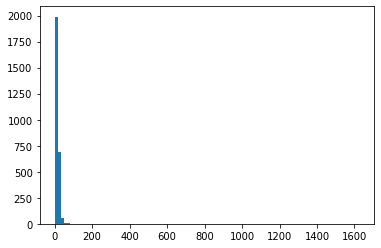

In [113]:
plt.hist(rlength, bins=100)
plt.show()

In [114]:
max_length = 20

In [158]:
train_reviews_tknz = list(np.array(reviews_tknz, dtype=object)[train_indx])
test_reviews_tknz = list(np.array(reviews_tknz, dtype=object)[test_indx])

train_reviews = [r for r in train_reviews_tknz if len(r) <= max_length]
train_reviews_lab = [lab for (r,lab) in zip(train_reviews_tknz,trainY) if len(r) <= max_length]
train_reviews_lab = np.int32(train_reviews_lab)

test_reviews = [r for r in test_reviews if len(r) <= max_length]
test_reviews_lab = [lab for (r,lab) in zip(test_reviews_tknz,testY) if len(r) <= max_length]
testY_embs = np.int32(test_reviews_lab)

In [176]:
import gensim.downloader

glove_vectors = gensim.downloader.load('glove-twitter-200')

train_embs = [[glove_vectors[w] for w in r if w in glove_vectors.key_to_index]for r in train_reviews]
test_embs = [[glove_vectors[w] for w in r if w in glove_vectors.key_to_index] for r in test_reviews]

[==================================================] 100.0% 758.5/758.5MB downloaded


In [178]:
trainX_embs = np.zeros([len(train_embs), max_length, 200], dtype=np.float32)
for i in range(len(train_embs)):
    len_review = len(train_embs[i])
    if len_review > 0:
        trainX_embs[i,-len_review:] = np.array(train_embs[i])

from sklearn.model_selection import train_test_split

trainX_embs, validX_embs, trainY_embs, validY_embs = train_test_split(trainX_embs, train_reviews_lab)

testX_embs = np.zeros([len(test_embs), max_length, 200], dtype=np.float32)
for i in range(len(test_embs)):
    len_review = len(test_embs[i])
    if len_review > 0:
        testX_embs[i,-len_review:] = np.array(test_embs[i])

In [179]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

In [212]:
model = keras.Sequential()

model.add(layers.Input([max_length,200]))
model.add(layers.GRU(400))

model.add(layers.Dense(400, activation='relu'))
model.add(layers.Dense(400, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_10 (GRU)                (None, 400)               722400    
                                                                 
 dense_38 (Dense)            (None, 400)               160400    
                                                                 
 dense_39 (Dense)            (None, 400)               160400    
                                                                 
 dense_40 (Dense)            (None, 1)                 401       
                                                                 
Total params: 1,043,601
Trainable params: 1,043,601
Non-trainable params: 0
_________________________________________________________________


In [213]:
opt = SGD(lr=1e-3, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='C:\\Users\\linhl\\Desktop\\IT7143\\Module 12',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

model.fit(trainX_embs, trainY_embs, epochs=750, batch_size=256, validation_data=(validX_embs, validY_embs), callbacks=[model_checkpoint_callback])

Epoch 1/750
5/5 [==============================] - 3s 351ms/step - loss: 0.6958 - accuracy: 0.5000 - val_loss: 0.6945 - val_accuracy: 0.4901
Epoch 2/750
5/5 [==============================] - 1s 267ms/step - loss: 0.6949 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.4926
Epoch 3/750
5/5 [==============================] - 1s 260ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6917 - val_accuracy: 0.4926
Epoch 4/750
5/5 [==============================] - 1s 278ms/step - loss: 0.6920 - accuracy: 0.5082 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 5/750
5/5 [==============================] - 1s 288ms/step - loss: 0.6908 - accuracy: 0.5181 - val_loss: 0.6896 - val_accuracy: 0.5369
Epoch 6/750
5/5 [==============================] - 1s 271ms/step - loss: 0.6898 - accuracy: 0.5567 - val_loss: 0.6888 - val_accuracy: 0.5714
Epoch 7/750
5/5 [==============================] - 1s 271ms/step - loss: 0.6890 - accuracy: 0.5764 - val_loss: 0.6881 - val_accuracy: 0.5862
Epoch 8/750
5

Epoch 59/750
5/5 [==============================] - 1s 238ms/step - loss: 0.6623 - accuracy: 0.6683 - val_loss: 0.6631 - val_accuracy: 0.6749
Epoch 60/750
5/5 [==============================] - 1s 239ms/step - loss: 0.6618 - accuracy: 0.6658 - val_loss: 0.6626 - val_accuracy: 0.6749
Epoch 61/750
5/5 [==============================] - 1s 242ms/step - loss: 0.6612 - accuracy: 0.6658 - val_loss: 0.6620 - val_accuracy: 0.6749
Epoch 62/750
5/5 [==============================] - 1s 258ms/step - loss: 0.6607 - accuracy: 0.6757 - val_loss: 0.6614 - val_accuracy: 0.6798
Epoch 63/750
5/5 [==============================] - 1s 301ms/step - loss: 0.6601 - accuracy: 0.6806 - val_loss: 0.6609 - val_accuracy: 0.6847
Epoch 64/750
5/5 [==============================] - 1s 265ms/step - loss: 0.6595 - accuracy: 0.6814 - val_loss: 0.6603 - val_accuracy: 0.6798
Epoch 65/750
5/5 [==============================] - 1s 238ms/step - loss: 0.6590 - accuracy: 0.6790 - val_loss: 0.6598 - val_accuracy: 0.6798
Epoch 

5/5 [==============================] - 1s 256ms/step - loss: 0.5667 - accuracy: 0.7241 - val_loss: 0.5741 - val_accuracy: 0.7266
Epoch 174/750
5/5 [==============================] - 1s 252ms/step - loss: 0.5657 - accuracy: 0.7225 - val_loss: 0.5734 - val_accuracy: 0.7266
Epoch 175/750
5/5 [==============================] - 1s 238ms/step - loss: 0.5645 - accuracy: 0.7217 - val_loss: 0.5723 - val_accuracy: 0.7266
Epoch 176/750
5/5 [==============================] - 1s 247ms/step - loss: 0.5632 - accuracy: 0.7217 - val_loss: 0.5712 - val_accuracy: 0.7192
Epoch 177/750
5/5 [==============================] - 1s 241ms/step - loss: 0.5621 - accuracy: 0.7250 - val_loss: 0.5703 - val_accuracy: 0.7217
Epoch 178/750
5/5 [==============================] - 1s 243ms/step - loss: 0.5609 - accuracy: 0.7233 - val_loss: 0.5695 - val_accuracy: 0.7241
Epoch 179/750
5/5 [==============================] - 1s 240ms/step - loss: 0.5599 - accuracy: 0.7266 - val_loss: 0.5689 - val_accuracy: 0.7266
Epoch 180/750

5/5 [==============================] - 1s 241ms/step - loss: 0.4477 - accuracy: 0.7841 - val_loss: 0.5144 - val_accuracy: 0.7438
Epoch 288/750
5/5 [==============================] - 1s 239ms/step - loss: 0.4471 - accuracy: 0.7874 - val_loss: 0.5145 - val_accuracy: 0.7463
Epoch 289/750
5/5 [==============================] - 1s 242ms/step - loss: 0.4452 - accuracy: 0.7882 - val_loss: 0.5147 - val_accuracy: 0.7463
Epoch 290/750
5/5 [==============================] - 1s 243ms/step - loss: 0.4449 - accuracy: 0.7898 - val_loss: 0.5141 - val_accuracy: 0.7438
Epoch 291/750
5/5 [==============================] - 1s 243ms/step - loss: 0.4437 - accuracy: 0.7865 - val_loss: 0.5151 - val_accuracy: 0.7463
Epoch 292/750
5/5 [==============================] - 1s 240ms/step - loss: 0.4439 - accuracy: 0.7923 - val_loss: 0.5139 - val_accuracy: 0.7488
Epoch 293/750
5/5 [==============================] - 1s 238ms/step - loss: 0.4454 - accuracy: 0.7931 - val_loss: 0.5135 - val_accuracy: 0.7537
Epoch 294/750

5/5 [==============================] - 1s 239ms/step - loss: 0.3645 - accuracy: 0.8342 - val_loss: 0.5102 - val_accuracy: 0.7783
Epoch 402/750
5/5 [==============================] - 1s 235ms/step - loss: 0.3644 - accuracy: 0.8342 - val_loss: 0.5068 - val_accuracy: 0.7685
Epoch 403/750
5/5 [==============================] - 1s 236ms/step - loss: 0.3666 - accuracy: 0.8366 - val_loss: 0.5087 - val_accuracy: 0.7734
Epoch 404/750
5/5 [==============================] - 1s 237ms/step - loss: 0.3714 - accuracy: 0.8358 - val_loss: 0.5078 - val_accuracy: 0.7709
Epoch 405/750
5/5 [==============================] - 1s 236ms/step - loss: 0.3796 - accuracy: 0.8292 - val_loss: 0.5066 - val_accuracy: 0.7685
Epoch 406/750
5/5 [==============================] - 1s 236ms/step - loss: 0.3667 - accuracy: 0.8383 - val_loss: 0.5075 - val_accuracy: 0.7734
Epoch 407/750
5/5 [==============================] - 1s 237ms/step - loss: 0.3615 - accuracy: 0.8383 - val_loss: 0.5073 - val_accuracy: 0.7685
Epoch 408/750

5/5 [==============================] - 1s 238ms/step - loss: 0.3109 - accuracy: 0.8645 - val_loss: 0.5263 - val_accuracy: 0.7734
Epoch 516/750
5/5 [==============================] - 1s 239ms/step - loss: 0.3108 - accuracy: 0.8670 - val_loss: 0.5246 - val_accuracy: 0.7709
Epoch 517/750
5/5 [==============================] - 1s 237ms/step - loss: 0.3102 - accuracy: 0.8695 - val_loss: 0.5165 - val_accuracy: 0.7660
Epoch 518/750
5/5 [==============================] - 1s 237ms/step - loss: 0.3017 - accuracy: 0.8711 - val_loss: 0.5181 - val_accuracy: 0.7783
Epoch 519/750
5/5 [==============================] - 1s 238ms/step - loss: 0.3009 - accuracy: 0.8703 - val_loss: 0.5177 - val_accuracy: 0.7808
Epoch 520/750
5/5 [==============================] - 1s 237ms/step - loss: 0.3018 - accuracy: 0.8678 - val_loss: 0.5165 - val_accuracy: 0.7759
Epoch 521/750
5/5 [==============================] - 1s 237ms/step - loss: 0.3009 - accuracy: 0.8711 - val_loss: 0.5230 - val_accuracy: 0.7783
Epoch 522/750

5/5 [==============================] - 1s 239ms/step - loss: 0.2561 - accuracy: 0.8949 - val_loss: 0.5457 - val_accuracy: 0.7685
Epoch 630/750
5/5 [==============================] - 1s 238ms/step - loss: 0.2592 - accuracy: 0.8900 - val_loss: 0.5415 - val_accuracy: 0.7709
Epoch 631/750
5/5 [==============================] - 1s 239ms/step - loss: 0.2688 - accuracy: 0.8859 - val_loss: 0.5415 - val_accuracy: 0.7709
Epoch 632/750
5/5 [==============================] - 1s 238ms/step - loss: 0.2673 - accuracy: 0.8834 - val_loss: 0.5481 - val_accuracy: 0.7882
Epoch 633/750
5/5 [==============================] - 1s 240ms/step - loss: 0.2548 - accuracy: 0.8982 - val_loss: 0.5523 - val_accuracy: 0.7906
Epoch 634/750
5/5 [==============================] - 1s 238ms/step - loss: 0.2586 - accuracy: 0.8941 - val_loss: 0.5544 - val_accuracy: 0.7906
Epoch 635/750
5/5 [==============================] - 1s 239ms/step - loss: 0.2581 - accuracy: 0.8957 - val_loss: 0.5477 - val_accuracy: 0.7685
Epoch 636/750

5/5 [==============================] - 1s 252ms/step - loss: 0.2154 - accuracy: 0.9163 - val_loss: 0.5833 - val_accuracy: 0.7808
Epoch 744/750
5/5 [==============================] - 1s 252ms/step - loss: 0.2135 - accuracy: 0.9146 - val_loss: 0.5841 - val_accuracy: 0.7857
Epoch 745/750
5/5 [==============================] - 1s 252ms/step - loss: 0.2116 - accuracy: 0.9113 - val_loss: 0.5938 - val_accuracy: 0.7833
Epoch 746/750
5/5 [==============================] - 1s 251ms/step - loss: 0.2172 - accuracy: 0.9122 - val_loss: 0.5997 - val_accuracy: 0.7808
Epoch 747/750
5/5 [==============================] - 1s 252ms/step - loss: 0.2187 - accuracy: 0.9097 - val_loss: 0.5954 - val_accuracy: 0.7833
Epoch 748/750
5/5 [==============================] - 1s 252ms/step - loss: 0.2212 - accuracy: 0.9097 - val_loss: 0.5965 - val_accuracy: 0.7833
Epoch 749/750
5/5 [==============================] - 1s 251ms/step - loss: 0.2157 - accuracy: 0.9122 - val_loss: 0.5985 - val_accuracy: 0.7833
Epoch 750/750

In [214]:
model.load_weights('C:\\Users\\linhl\\Desktop\\IT7143\\Module 12')
model.evaluate(testX_embs, testY_embs)

19/19 [==============================] - 1s 31ms/step - loss: 0.4952 - accuracy: 0.8051


[0.4951643943786621, 0.8051282167434692]